In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Synaptic Current

In [57]:
def membrane_voltage(v_m1, g, i_syn_func,  params):      
    return (-v_m1 + params['Em'] - params['Rm']*i_syn_func(g, v_m1, params) + params['RmIe'])/params['tau_m']

In [58]:
def membrane_x(x_m1, t, params):
    ret_val = - x_m1 / params['tau_syn']
    
    if np.abs(t - params['t_spike'])< 0.5 * params['del_t']:
        ret_val += params['g_star']/params['del_t']        
    return ret_val

In [59]:
def synaptic_conductance(g_syn_m1, x, t, params):
    g = (x - g_syn_m1)/params['tau_syn'] 
    return  g

In [60]:
def synaptic_current(g_syn, v, params):
    return g_syn*(v - params['E_syn'])

In [61]:
def membrance_current(v, params):
    return (v - params['Em'])/params['Rm']

In [62]:
def membrane_euler(v_func, g_func, x_func, i_syn_func, params, init_values):
    t = np.arange(0, params['max_t'], step=params['del_t'])
    
    v_res = np.zeros_like(t)
    g_res = np.zeros_like(t)
    x_res = np.zeros_like(t)
    
    v_res[0] = init_values['v0']
    g_res[0] = init_values['g0']
    x_res[0] = init_values['x0']

    for i in range(1, t.shape[0]):
        x_res[i] = x_res[i-1] +  params['del_t'] * x_func(x_m1=x_res[i-1], t=t[i], params=params)
        g_res[i] = g_res[i-1] +  params['del_t'] * g_func(g_syn_m1=g_res[i-1], x=x_res[i], t=t[i], params=params)
        v_res[i] = v_res[i-1] +  params['del_t'] * v_func(v_m1=v_res[i-1], g=g_res[i], i_syn_func=i_syn_func,  params=params)
    return v_res, g_res

In [63]:
params = {}
params['tau_syn'] = 10e-3
params['tau_m'] = 10e-3
params['Rm'] = 1e7
params['g_star'] = 30e-9
params['Em'] = -80e-3
params['RmIe'] = 0

# exhibitory synapse
params['E_syn'] = 0

In [64]:
params['t_spike'] = 0.01
params['del_t'] = 0.0001
params['max_t'] = 1

In [65]:
init_values = {}
init_values['v0'] = params['Em']
init_values['g0'] = 0
init_values['x0'] = 0

In [66]:
v_res, g_res =membrane_euler(membrane_voltage, synaptic_conductance, membrane_x, synaptic_current, params, init_values)

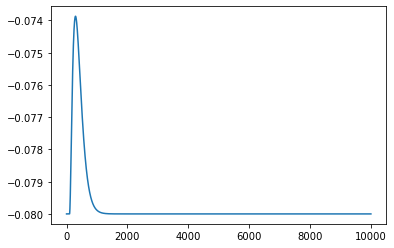

In [67]:
plt.plot(v_res)


In [68]:
np.max(v_res)

-0.07387011427433816

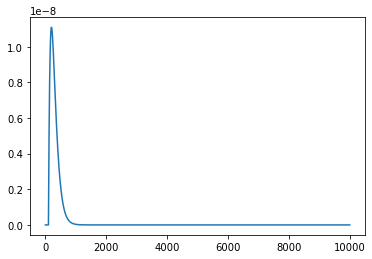

In [69]:
plt.plot(g_res)

In [70]:
def shunting_inhibition_current(g_syn, v, params):
    return g_syn*(v - params['E_syn']) + params['g_exc']*(v - params['E_exc']) + params['g_inh']*(v - params['E_inh'])

In [71]:
params['g_exc'] = 50e-9
params['g_inh'] = 200e-9

params['E_exc'] = 0
params['E_inh'] = -100e-3

In [72]:
v_res, g_res =membrane_euler(membrane_voltage, synaptic_conductance, membrane_x, shunting_inhibition_current, params, init_values)

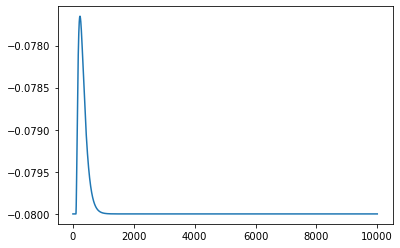

In [73]:
plt.plot(v_res)

In [55]:
np.max(v_res)

-0.07765250504579103

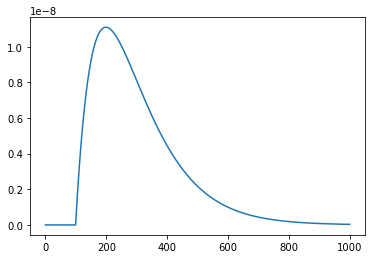

In [54]:
plt.plot(g_res)